In [2]:
import pandas as pd

adult_census = pd.read_csv("scikit-learn-mooc/datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

In [3]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state=0)

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)


In [5]:
import pandas as pd
from sklearn.model_selection import cross_validate

cv_results_model = cross_validate(model, data, target, cv=cv)
s = pd.Series(cv_results_model["test_score"], name="log_reg")
s

0    0.815937
1    0.813849
2    0.815036
3    0.815569
4    0.810982
5    0.814831
6    0.813112
7    0.810368
8    0.812375
9    0.816306
Name: log_reg, dtype: float64

In [7]:
from sklearn.dummy import DummyClassifier

dummy0 = DummyClassifier(strategy="most_frequent")

cv_results_dummy = cross_validate(dummy0, data, target, cv=cv)
dummy1 = pd.Series(cv_results_dummy)
dummy1

fit_time      [0.013521194458007812, 0.016109943389892578, 0...
score_time    [0.029175519943237305, 0.016802072525024414, 0...
test_score    [0.7603292248474673, 0.7568076655337619, 0.759...
dtype: object

In [8]:
scores_df = pd.concat([s, dummy1], axis=1)
scores_df

,log_reg,0
0,0.815937,NaN
1,0.813849,NaN
2,0.815036,NaN
3,0.815569,NaN
4,0.810982,NaN
5,0.814831,NaN
6,0.813112,NaN
7,0.810368,NaN
8,0.812375,NaN
9,0.816306,NaN


Text(0.5, 1.0, 'distribution')

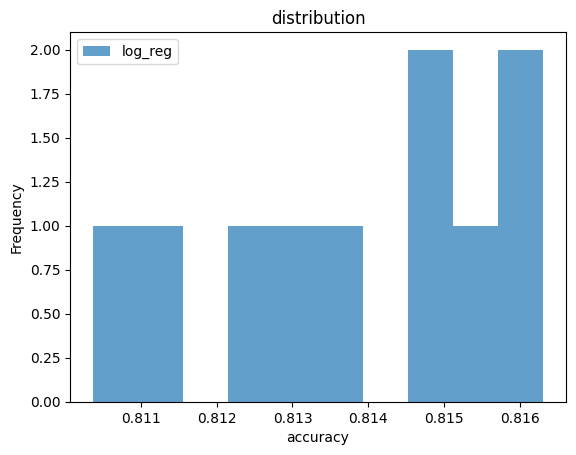

In [10]:
h11 = scores_df.plot(kind="hist", bins=10, alpha=0.7)
h11.set_xlabel("accuracy")
h11.set_title("distribution")